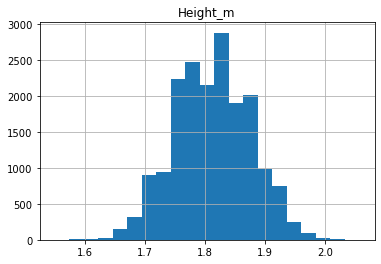

w_0 = 12.661448210763886, w_1 = 0.8260837501616025
Train MSE 33.196115561005136, test MSE 31.608785962093922


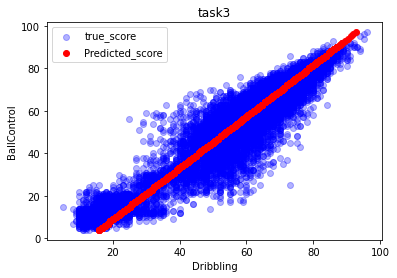

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline
data = pd.read_csv("data.csv", index_col='ID')
pd.set_option('display.max_columns', None)
data.head()
#task1 -1 point
data['Height_floatfeet'] = data['Height'].str.extract(r"([0-7]+)'").astype(float)
data['Height_floatfeet'].head(1000)
data['Height_floatinch'] = data['Height'].str.extract(r"'([1,2,3,4,5,6,7,8,9,10,11]+)").astype(float)
data['Height_floatinch'].head(1000)
data['Height_inc2']=(data['Height_floatfeet']*12+data['Height_floatinch'])
data['Height_inc']=data['Height_inc2'].dropna()
Feetinches = 0.0254
data['Height_m'] = data.apply(lambda row: row['Height_inc'] * Feetinches, axis=1)
pd.set_option('display.max_rows', None)
data.hist(column='Height_m', bins=21)
plt.show()
#end of 1 task
#Example 5.
#sns.pairplot(data[['ShortPassing', 'Dribbling', 'BallControl', 'Strength']])
#Example 6.
#data['age_group'] = data.apply(lambda x: 'young' if x['Age'] < 20 else 'mature' if x['Age'] <= 30 else 'masters', axis=1)
#distr = data.groupby('age_group').count().max(axis=1)[['young', 'mature', 'masters']]
#plt.bar(distr.index, distr.values)
#plt.ylabel('Number of players')
#plt.title('Distribution of players across age groups')
#plt.show()
#Example 7.
#sns.boxplot(x='age_group', y='SprintSpeed', data=data);
#Example2.1
from sklearn.model_selection import train_test_split
data.fillna({'BallControl': data['BallControl'].mean(), 'Dribbling': data['Dribbling'].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data['Dribbling'].values, data['BallControl'].values, train_size=0.8)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
from sklearn.linear_model import Ridge
lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)
print(f'w_0 = {lr.intercept_}, w_1 = {lr.coef_[0]}')
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
data['predicted_BallControl'] = lr.predict(data['Dribbling'].values.reshape(-1, 1))
data[['Name', 'Dribbling', 'BallControl', 'predicted_BallControl']].head()
#Task 2 (0.5 point)
from sklearn.metrics import mean_squared_error
def mse(y_true, y_pred):
    error = (np.square(y_true - y_pred)).mean(axis=None)
    return error
assert round(mean_squared_error(y_train, y_pred_train), 9) == round(mse(y_train, y_pred_train), 9)
assert round(mean_squared_error(y_test, y_pred_test), 9) == round(mse(y_test, y_pred_test), 9)
print(f'Train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')
#Task3 1.5 points
fig, ax = plt.subplots()
#plt.scatter(data[['predicted_BallControl', 'BallControl'], ['Dribbling]])
x=data['BallControl']
x2=data['predicted_BallControl']
y=data['Dribbling']
ax.scatter(x,y,c='b', alpha=0.3, label='true_score')
ax.scatter(x2,y, c='r', label='Predicted_score')
ax.legend([('true_score'), ('Predicted_score')])
plt.xlabel('Dribbling')
plt.ylabel('BallControl')
plt.title('task3')
plt.show()
#task4 (5 points)
#scipy.optimize.least_squares(fun, x0,args=())
#x0=make_strictly_feasible(x0,lb, ub)
#f0=fun_wrapped(x0)
#if f9.ndim !=1:
    #def fin_wrapped(x):
        #return np.atlets_1d(fun(x, *args, **kwargs))
    #if metthod =='trf'
#def compute_residuals(w, X, y)
#w=numpy.ndarrya.data['Dribbling']
#X=numpy.ndarray.data['BallControl']
#y=numpy.ndarray: float64['Predicted_score']
    #residuals = # Your code here
    #return residuals
#from sklearn.base import BaseEstimator
#from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
#from scipy.optimize import least_squares

#class LinearRegression(BaseEstimator):
    #def __init__(self, fit_intercept=True):
        #self.fit_intercept = fit_intercept
    #def fit(self, X, y):